# ***Prediction using Unsupervised Machine Learning***

*From the given ‘Iris’ dataset, predict the optimum number of clusters(K-Means) and represent it visually*.  
### **UnSupervised Learning**:
Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data.  
### **Clustering**:
A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
### **K-Means Clustering:**
It is the simplest unsupervised learning algorithm that solves clustering problem.K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster

## ***By K V Saicharan***

## **IMPORTING REQUIRED LIBRARIES**

In [ ]:
#Including Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

## **IRIS DATASET**

In [ ]:
#Reading data from link
data=load_iris()

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## **USING ELBOW METHOD TO FIND NUMBER OF CLUSTERS OF KMEANS**

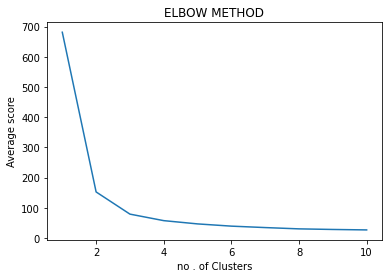

In [ ]:
sse=[]
for n in range(1,11):
    kmean=KMeans(n_clusters=n,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmean.fit(iris['data'])
    sse.append(kmean.inertia_)
#Now plotiing the results on the line graph
from matplotlib import pyplot as plt
plt.plot(range(1,11),sse)
plt.title('ELBOW METHOD')
plt.xlabel('no . of Clusters')
plt.ylabel('Average score')
plt.show()

### **From the graph the elbow point is 3 and hence optimum no. of cluster is 3.**

## **APPLYING K-MEANS CLUSTERING METHOD**

In [ ]:
#we willcreate k-mean classifier
model=KMeans(n_clusters=3)
#fitting iris data
model.fit(iris['data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#prediction of datset
data.target=model.labels_
d1=data[data.target==0]
d2=data[data.target==1]
d3=data[data.target==2]

In [ ]:
#centriods is
model.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

## **PLOTING GRAPH FOR IRIS DATA**

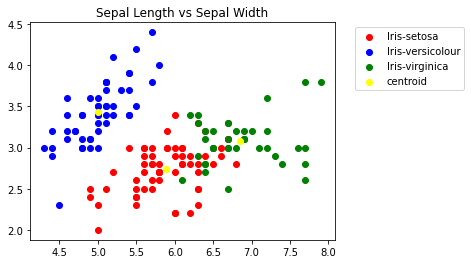

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(d1[['sepal length (cm)']],d1[['sepal width (cm)']], color = 'red', label = 'Iris-setosa')
plt.scatter(d2[['sepal length (cm)']], d2[['sepal width (cm)']], color = 'blue', label = 'Iris-versicolour')
plt.scatter(d3[['sepal length (cm)']], d3[['sepal width (cm)']], color = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, [0]], model.cluster_centers_[:,[1]], color = 'yellow', label = 'centroid')
plt.title('Sepal Length vs Sepal Width')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

# ***THANK YOU***
# ***K V SAI CHARAN***